# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

##### Project Goal:

The goal of this project is to examine the dataset of job postings, and predict salaries for a new set of postings. - This will involve building a model to predict the salaries given in the test dataset.

##### Practical use:
HR Department of a large company or a Consulting groups that needs real-time solutions in order to make effective employment offers to potential hires.

It also finds use in getting to understand current realities in the job market and how businesses can leverage this in order to secure high quality talent, while keeping recuritment cost low.

The primary tool used for this project is Python 3, along with an extensive array of libraries and packages available for the manipulation of data,and development of predictive modeling algorithms.

##### Project Structure:

###### Defining the Problem: 
Creating "Data" and "Plots" classes and objects to aid us in extracting, manipulating the given data Exploratory Data Analysis This involves looking at the Data Summaries and Visualizations in order to:

Examine the Data Discover patterns and relationships between the features Identify the types of data Clean up the Data Creating classes and objects for Feature Engineering, and Model Selection This will help us preprocess and create new features from existing ones. Here we shall also select the best model for prediction. The algorithms chosen for this are:

Linear Regression Random Forest Regressor Gradient Boosting Regressor The Evaluation metric used for these models is the Mean Squared Error.

Also we shall look at the Feature Importances, and how each feature performs with the best model selected in making predictions.

Saving the results for Deployment Defining the problem Our twofold goal in this project is to:

Load and Explore Data Develop and train a suitable prediction model

Write the problem in your own words here

In [1]:
#import necessary required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#etc

#Author info
__author__ = "Ganesh Dnyaneshwar Dhasade"
__email__ = "g.dhasade16@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

- Received data having 2 files 
    1. Contains job features 
    2. Contains salaries for each job.
- In both sheets, JobID is common column
- First we import both files and merge them into one single dataframe with reference to jobID

In [2]:
#load the data into a Pandas dataframe
DataFrame1 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_features.csv")
DataFrame2 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_salaries.csv")
TestData = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/test_features.csv")
#Megre both dataframe into one
CompleteDataFrame = DataFrame1.merge(DataFrame2, on='jobId')

### ---- 3 Clean the data ----

### ---- Train Dataset -----

In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
#Create copy of clean dataset for cleaning
CleanDataFrame = CompleteDataFrame.copy()

In [5]:
CleanDataFrame.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [6]:
#Check duplicate rows
CleanDataFrame.duplicated().sum()

0

There are zero duplicate rows in dataset

In [7]:
# Check invalid data
InvCount = 0
for i in CleanDataFrame['salary']:
    if(i <= 0 ):
        print(i)
        InvCount = InvCount + 1
        
print("There are {} invalid salaries i.e contains 0".format(InvCount))

0
0
0
0
0
There are 5 invalid salaries i.e contains 0


There are 5 invalid entries in salary column and all having value 0,
Hence need to handle those 5 values

In [8]:
# Now, check how may null values in dataframe
CleanDataFrame.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

The dataset is clean and don't have any null values

In [9]:
CleanDataFrame.shape

(1000000, 9)

In [10]:
# check datatype of each features
CleanDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


There are 3 numerical columns </n>
and 6 categorical columns & doesn't have any null value

### ---- 4 Explore the data (EDA) ----

In [11]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [12]:
EDATrain = CleanDataFrame.copy()

In [13]:
EDATrain.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


### Observation:
- Except salary colum other two features having median and mean close to each other
- Salary: 
    Mean is greater than median shows its right skewed/ positive sekwed and contains outliers
 

<AxesSubplot:xlabel='yearsExperience'>

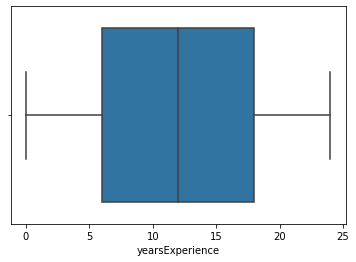

In [14]:
# Visualize box plot for all 3 numerical columns
sns.boxplot(x=EDATrain["yearsExperience"])

<AxesSubplot:xlabel='milesFromMetropolis'>

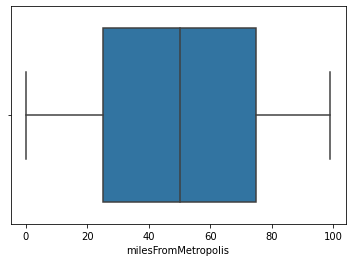

In [15]:
sns.boxplot(x=EDATrain["milesFromMetropolis"])

<AxesSubplot:xlabel='salary'>

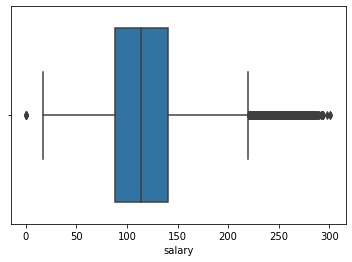

In [16]:
sns.boxplot(x=EDATrain["salary"])

### Remove outlier we use box plot outlier calculation formula
- As we can see above 3 visualizations in box plot salary having outliers
- Remove the outliers rows from the dataset
- As there are only 5 rows out of 1million datarows we can delete
- refer to get more about formula: https://www.simplypsychology.org/boxplots.html#:~:text=When%20reviewing%20a%20box%20plot,whiskers%20of%20the%20box%20plot.&text=For%20example%2C%20outside%201.5%20times,Q3%20%2B%201.5%20*%20IQR).
- So basically use formula:
     - outside 1.5 times the interquartile range above the upper quartile and 
     - below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

In [17]:
DescriptiveStatsSalary = EDATrain.salary.describe()

print(DescriptiveStatsSalary)

IQR = DescriptiveStatsSalary['75%'] - DescriptiveStatsSalary['25%']

upper = DescriptiveStatsSalary['75%'] + 1.5 * IQR

lower = DescriptiveStatsSalary['25%'] - 1.5 * IQR

print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [18]:
# Lets check values of those rows whose salary is less than 8.5 (lower bound)
EDATrain[EDATrain.salary < 8.5]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [19]:
# So we have 5 rows whose salary is 0 and yeah those are outliers lets remove those rows
EDATrain = EDATrain[EDATrain.salary > 8.5]
EDATrain.shape

(999995, 9)

In [20]:
# Lets check the rows and its value of outliers whose value is more than upper boud i.e 220.5
EDATrain[EDATrain.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [21]:
#check potential outlier above upper bound
EDATrain.loc[EDATrain.salary > 222.5, 'jobType'].value_counts()


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

### Inference
- As there are 7117 rows so need to go deep and check those rows
- In any organisation, top most positions are less as compare to low positons
- Hence, as we see most of top most position (like CEO, CTO, CFO etc.) salary are more as compare to low positon (Jr., associates etc)
- Hence, we will not remove those rows as they play an important role in dataset.
- But, as in above results shows 16 juniors also crossing the upperbond, hence lets check the salary of juinors

In [22]:
EDATrain.loc[(EDATrain.salary > 222.5) &  (EDATrain.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


### Observations
- As we check the degree and the industry of those juniors having salary more than upper bond
- Salary make sense, as in finance and oil industry the junior position with good education have good salaries
- Hence we are not removing outliers from having more salary than upperbond.

### Lets check correlation between the features

In [23]:
EDATrain.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [24]:
EDATrain.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [25]:
def plot_variables(df,var): 
    '''
    produce plot for each features
    plot1(left), the distribution of samples on the feature
    plot2(right), the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    if df[var].dtype == 'int64':
        df[var].value_counts().sort_index().plot()
    else:
        #change the object datatype of each variable to category type and order their level by the mean salary
        mean = df.groupby(var)["salary"].mean()
        df[var] = df[var].astype('category')
        level = mean.sort_values().index.tolist()
        df[var].cat.reorder_categories(level, inplace=True)
        df[var].value_counts().plot()        
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    if df[var].dtype == 'int64' or var == "companyId": # there are many companyId and better to see with line
        #plot the mean salary for each category and shade the line between the (mean - std, mean + std)
        mean = df.groupby(var)["salary"].mean()
        std = df.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y="salary", data= df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

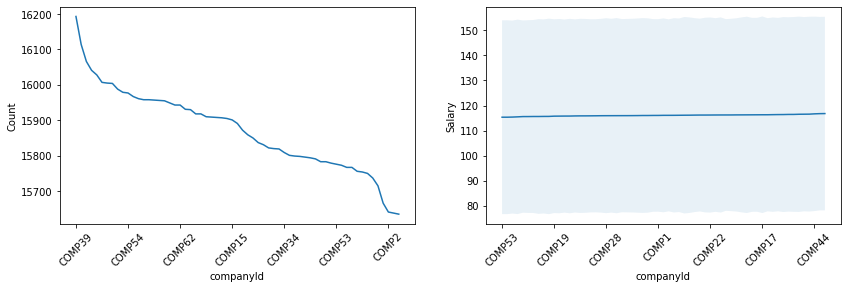

In [26]:
plot_variables(EDATrain,"companyId")

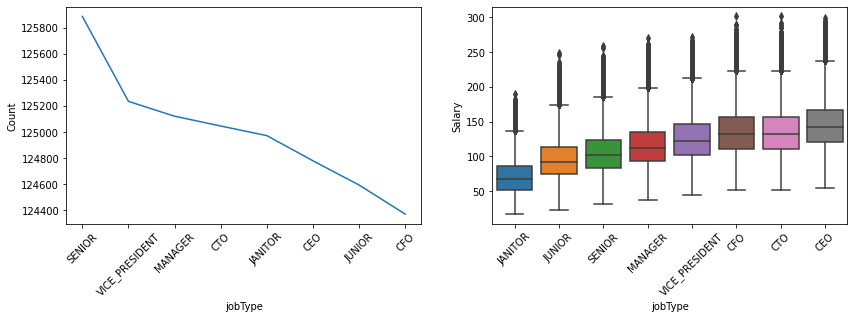

In [27]:
plot_variables(EDATrain,"jobType")

### Observation:
- Salary vs Job type : jobtype is highly correlated with salary.
- As jobtype or position is increase salary is increase

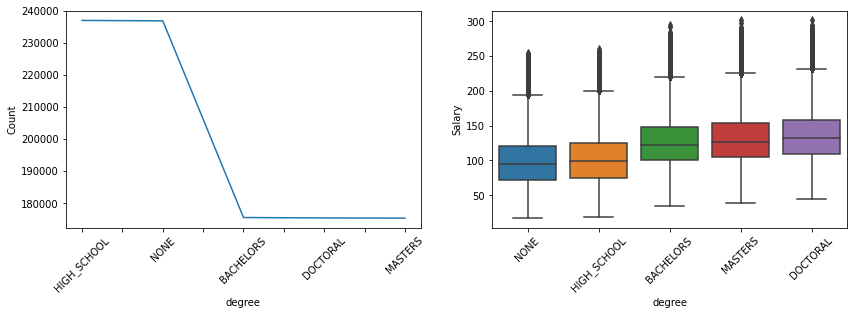

In [28]:
plot_variables(EDATrain,"degree")

### Observation:
- Salary vs Degree: Degree is correlated with salary.
- As degree is high salary is also high.
- But, for bachelors, masters and doctoral, median salary is same.
- It's true after several years in organisation and getting promoted to higher position salary increase.

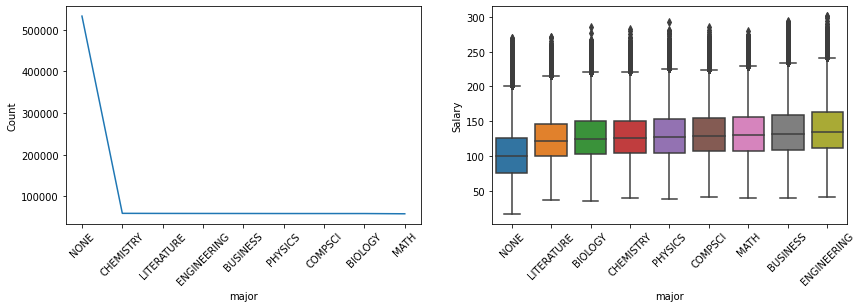

In [29]:
plot_variables(EDATrain,"major")

### Observation:
- Salary vs major: major is correlated with salary.
- But, for business, engineering, CompsCi, maths salary is more.


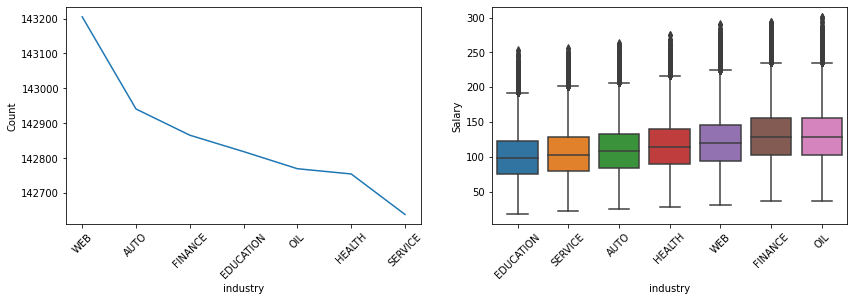

In [30]:
plot_variables(EDATrain,"industry")

### Observation:
- Salary vs Industry: Industry is correlated with salary.
- Maximum salary have in Finance and Oil industry.

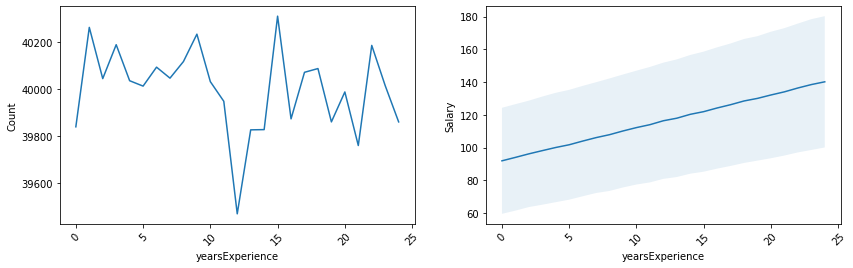

In [31]:
plot_variables(EDATrain,"yearsExperience")

### Observation:
- Salary vs Years Experience: yearsExperience is correlated with salary.
- As years of experience is more the salary is more, data match with real life scenarios.

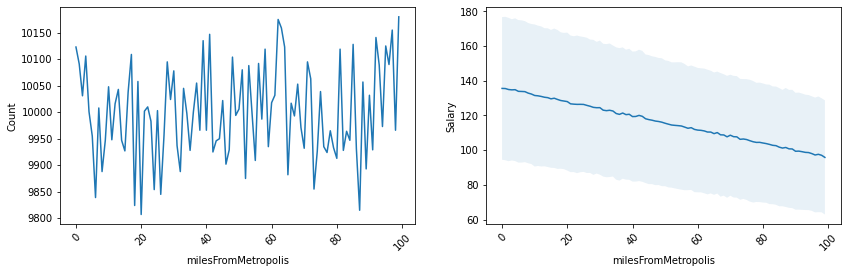

In [32]:
plot_variables(EDATrain,"milesFromMetropolis")

### Observation:
- Data is distorted hence, unable to say its correlated or not.


In [33]:
EDATrain.shape

(999995, 9)

In [34]:
EDATrain.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

### Visualise the corelation between columns

In [35]:
VisualData = EDATrain.copy()

In [36]:
VisualData.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [37]:
VisualData = VisualData.drop(['jobId'],axis=1)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
def Encode_Data(dataframe):    
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe

In [40]:
EncodedData = Encode_Data(VisualData)

In [41]:
EncodedData.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,113
1,11,0,2,7,6,3,73,84
2,48,7,1,8,3,10,38,120
3,32,5,1,2,0,8,17,125
4,60,7,0,8,2,8,16,146


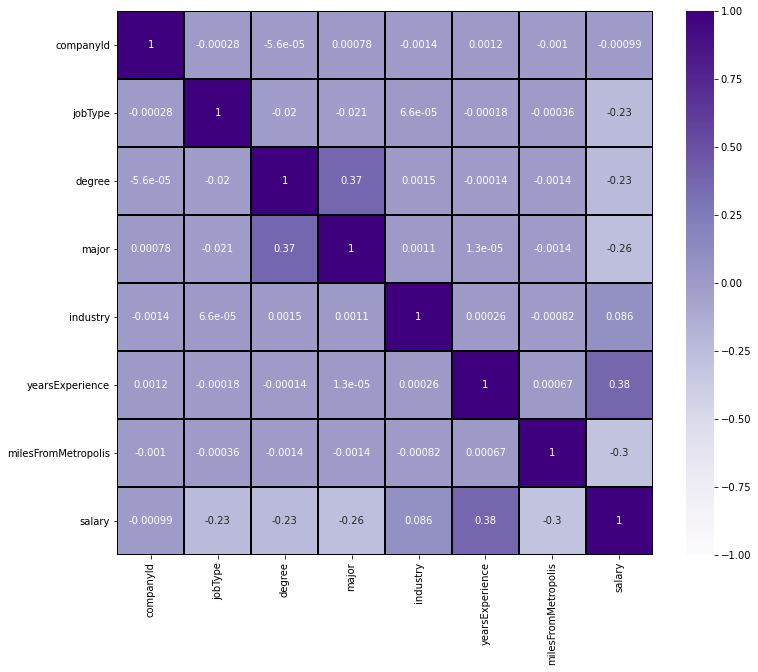

In [42]:
# Heatmap to check correlation between each feature
#a = PrepTrain.drop(['salary'],axis=1)
#df = a.join(PrepTrainTarget)
plt.figure(figsize=(12,10))
corr = EncodedData.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,cmap="Purples",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
plt.show()

### Observation:
- As there is an strong correlation between
    - YearsExperience and salary
    - Degree and major

### Prepare DATA
- Create copy of EDATrain data
- drop jobID, companyID features from PrepData
- Prepare Traget and IV features from PrepData

In [43]:
PrepTrain = EDATrain.copy()

In [44]:
PrepTrain.shape

(999995, 9)

In [45]:
PrepTrain.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [46]:
PrepTrainTarget = PrepTrain['salary']

In [47]:
#drop columns which not play n role in prediction
PrepTrainIV = PrepTrain.drop(['salary','jobId','companyId'],axis=1)

In [48]:
PrepTrainIV.dtypes

jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
dtype: object

In [49]:
#As machine learning model not accept categorical variable we should encode them using one hot encoding
#But first check numbers of category available in each feature
PrepTrainIV.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [50]:
def VisualCountCatVar(dataframe):
    CatCol = dataframe.select_dtypes(include=['category']).columns.tolist()
    for i in CatCol:
        print("------------",i," value counts---------------------")
        print(dataframe[i].value_counts())
        
    fig = plt.figure(figsize=(14, 18))
    
    for index, col in enumerate(CatCol):
        fig.add_subplot(3, 2, index+1)
        dataframe[col].value_counts()[:20].plot(kind='bar', title=col)
        plt.tight_layout()

In [51]:
def VisualCountCatVar(dataframe):
    CatCol = dataframe.select_dtypes(include=['category']).columns.tolist()
    fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(CatCol):
        print("------------",col," value counts---------------------")
        print(dataframe[col].value_counts())
        fig.add_subplot(3, 2, index+1)
        dataframe[col].value_counts()[:20].plot(kind='bar', title=col)
        plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in CatCol:
        a = dataframe[i].cat.categories
        print("There are {} categories in {}".format(len(a),i))


------------ jobType  value counts---------------------
SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
------------ degree  value counts---------------------
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64
------------ major  value counts---------------------
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64
------------ industry  value counts---------------------
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


------------Number

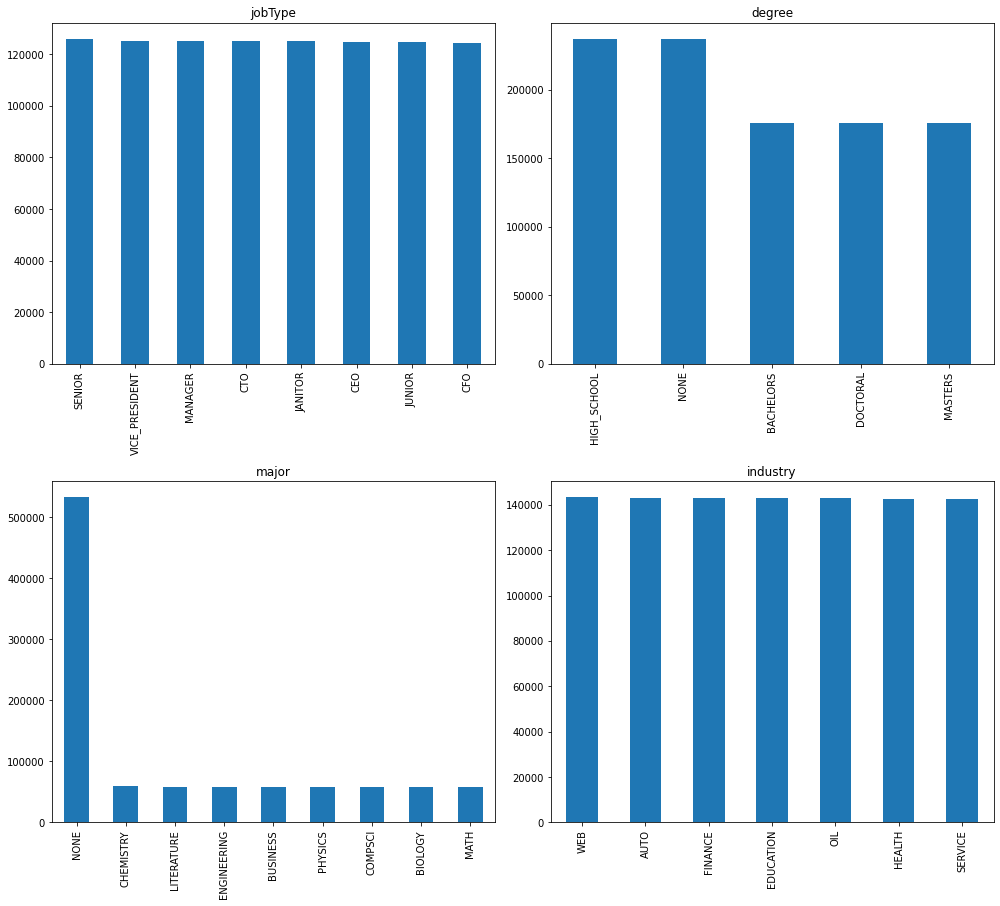

In [52]:
VisualCountCatVar(PrepTrainIV)

### Analysis
from above results we can infer below information:
- There are 4 categorical column and each have 
    - 8 categories in jobType
    - 5 categories in degree
    - 9 categories in major
    - 7 categories in industry
- It means total 29 dummies will be created
- But we use one hot encoding and remove one category from each category to reduce 4 more features
- Hence, total 25 new features(dummies) will be created.
- Already there are 6 column out of which 4 categorical and 2 integer
   - 2 integer columns + 25 dummies
   - Hence, total 27 features will be there.

## One hot encoding

In [53]:
print(PrepTrainIV.shape)
print(PrepTrainIV.columns)

(999995, 6)
Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')


In [54]:
PrepTrainIV = pd.get_dummies(PrepTrainIV, drop_first=True)

In [55]:
print(PrepTrainIV.shape)
print(PrepTrainIV.columns)

(999995, 27)
Index(['yearsExperience', 'milesFromMetropolis', 'jobType_JUNIOR',
       'jobType_SENIOR', 'jobType_MANAGER', 'jobType_VICE_PRESIDENT',
       'jobType_CFO', 'jobType_CTO', 'jobType_CEO', 'degree_HIGH_SCHOOL',
       'degree_BACHELORS', 'degree_MASTERS', 'degree_DOCTORAL',
       'major_LITERATURE', 'major_BIOLOGY', 'major_CHEMISTRY', 'major_PHYSICS',
       'major_COMPSCI', 'major_MATH', 'major_BUSINESS', 'major_ENGINEERING',
       'industry_SERVICE', 'industry_AUTO', 'industry_HEALTH', 'industry_WEB',
       'industry_FINANCE', 'industry_OIL'],
      dtype='object')


In [56]:
PrepTrain.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Now dataset is ready
- Independent variables : PrepTrainIV
- Dependent Variable : PrepTrainTarget

### ---- 5 Establish a baseline ----

In [57]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [58]:
PrepTrainIV.columns

Index(['yearsExperience', 'milesFromMetropolis', 'jobType_JUNIOR',
       'jobType_SENIOR', 'jobType_MANAGER', 'jobType_VICE_PRESIDENT',
       'jobType_CFO', 'jobType_CTO', 'jobType_CEO', 'degree_HIGH_SCHOOL',
       'degree_BACHELORS', 'degree_MASTERS', 'degree_DOCTORAL',
       'major_LITERATURE', 'major_BIOLOGY', 'major_CHEMISTRY', 'major_PHYSICS',
       'major_COMPSCI', 'major_MATH', 'major_BUSINESS', 'major_ENGINEERING',
       'industry_SERVICE', 'industry_AUTO', 'industry_HEALTH', 'industry_WEB',
       'industry_FINANCE', 'industry_OIL'],
      dtype='object')

In [59]:
PrepTrainTarget.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [60]:
#Import necesseary libraries
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [59]:
X_BaseModelTrain, X_BaseModelTest, Y_BaseModelTrain, Y_BaseModelTest = train_test_split(PrepTrainIV,PrepTrainTarget, test_size=0.30, random_state = 0)


In [60]:
# Adding models into RegressorModels list

In [61]:
RegressorModels = []
num_procs = 4

model1 = LinearRegression()
RegressorModels.append(model1)

model2 = RandomForestRegressor(n_estimators = 100, n_jobs = num_procs, max_depth = 25, min_samples_split = 60) 
RegressorModels.append(model2)

model3 = linear_model.Lasso(alpha=0.1)
RegressorModels.append(model3)

model4 = GaussianNB()
RegressorModels.append(model4)

model5 = DecisionTreeRegressor(max_depth = 15)
RegressorModels.append(model5)

model6 = GradientBoostingRegressor(n_estimators = 50, max_depth = 10) 
RegressorModels.append(model6)


In [93]:
for clf in RegressorModels:
    print("-------------",clf,"-----------------")
    clf.fit(X_BaseModelTrain, Y_BaseModelTrain)
    y_BaseModelPred= clf.predict(X_BaseModelTest)
    #cv_results = cross_validate(clf, X_BaseModelTrain,Y_BaseModelTrain, cv=10)
    scores = cross_validate(clf, X_BaseModelTrain,Y_BaseModelTrain, cv=10,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
    NegRMSE = -1.0*np.mean(scores['test_neg_mean_squared_error'])
    print("Mean square error for model ",clf, NegRMSE)
    print("Cross Validation Std deviation",np.std(NegRMSE))

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 384.4343474362457
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 372.6816680980277
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 394.5425194377651
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 10264.269250858399
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 440.41684804654676
Cross Validation Std deviation 0.0
------------- GradientBoostingRegressor(max_depth=10, n_estimators=50) -----------------
Mean square error for model  Grad

### Observation:
The RMSE of above gives results:
- LinearRegression: 384.4343474362457
- RandomForestRegressor: 372.5786564517086
- Lasso: 394.5425194377651
- GaussianNB: 10264.269250858399
- DecisionTreeRegressor: 440.4879866101536
- GradientBoostingRegressor: 363.689670789014

-- Hence, RandomForestRegressor and GradientBosstingRegressor comparitive give good results.

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model



In [61]:
# Assign the Dependent/Predictive variable to "Y"
Y = PrepTrainTarget.copy()
# Assign all the other variables/features except DV to independent variable "X"
X = PrepTrainIV.copy()

In [62]:
#-------------FEATURE SELECTION-----------------

In [70]:
#-------------1.PEARSON CORRELATION-------------
def Pcor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

#-------------2.CHI-SQUARE CORRELATION-------------

def ChiSQ(X, Y, num_feats):
    
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from numpy import set_printoptions
    selector = SelectKBest(chi2, k = 8)
    #New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
    X_new = selector.fit_transform(X, Y)
    names = X.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
    #Sort the dataframe for better visualization
    ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
    ns_df_sorted['Feat_names']
    col_names = ns_df_sorted['Feat_names'].tolist()
    return col_names

#--------3. Wrapper ---> Recursive Feature Elmination (RFE)--------------

def RFE(X, Y, num_feats):
    
    from sklearn.feature_selection import RFE
    model = LinearRegression()
    rfe = RFE(model, num_feats)
    fit = rfe.fit(X, Y)
    rank = pd.DataFrame(fit.ranking_,columns = ['rank'])
    column = pd.DataFrame(X.columns, columns = ['col'])
    Feature_Extraction = pd.concat([column,rank],axis=1)
    Feature_Extraction.sort_values(by=['rank'], inplace=True)
    # Check the rank of all the features
    Feature_Extraction = Feature_Extraction[Feature_Extraction['rank'] == 1] 
    chi_col_names = Feature_Extraction['col'].tolist()
    return chi_col_names


#--------4. Embbeded ---> LASSO --------------
def Lasso(X, Y, num_feats):
    from sklearn.linear_model import LassoCV
    reg = LassoCV()
    a = reg.fit(X, Y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
    coef = pd.Series(reg.coef_, index = X.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    Features = coef[coef != 0]
    Features = Features.sort_values(ascending = False)
    Features = Features.index
    count = num_feats
    FeaturesList=[]
    for i in Features:
        if (count != 0):
            FeaturesList.append(i)
        else:
            break
        count = count-1
    return FeaturesList

#--------5. Embbeded ---> RandomForest regressor--------------
def RFR(X, Y, num_feats):
    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor()
    # fit the model
    model.fit(X, Y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    feats = {} # a dict to hold feature_name: feature_importance
    SelectedFeatures = []
    count = num_feats
    for feature, importance in zip(X.columns, model.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    FeatureList = pd.DataFrame(feats.items())

    FeatureList = FeatureList.sort_values(by=[1], ascending=False)
    for i in FeatureList[0]:
        if (count != 0):
            SelectedFeatures.append(i)
        else:
            break
        count = count-1

    return SelectedFeatures

In [133]:
#------------Select Number of features -----------
NumFeatures = 18

In [134]:
#---- Pearson Corelation-----
cor_support, cor_feature = Pcor_selector(X, Y,num_feats=NumFeatures)
print(str(len(cor_feature)), 'selected features')

PCor_IV = X[cor_feature]
PCor_DV = Y
PCor_IV.columns

18 selected features


Index(['major_COMPSCI', 'jobType_SENIOR', 'major_MATH', 'degree_BACHELORS',
       'industry_SERVICE', 'major_BUSINESS', 'major_ENGINEERING',
       'industry_FINANCE', 'industry_OIL', 'degree_MASTERS', 'jobType_CFO',
       'jobType_CTO', 'jobType_JUNIOR', 'degree_HIGH_SCHOOL',
       'degree_DOCTORAL', 'jobType_CEO', 'milesFromMetropolis',
       'yearsExperience'],
      dtype='object')

In [135]:
#---- Chi square-----
#ChiSQ_feature = ChiSQ(X, Y,num_feats=NumFeatures)
#ChiSQ_IV = X[ChiSQ_feature]
#ChiSQ_DV = Y
#ChiSQ_IV.columns

In [136]:
#---- RFE - Random Forest Elimination -----
RFE_feature = RFE(X, Y,num_feats=NumFeatures)
RFE_IV = X[RFE_feature]
RFE_DV = Y
RFE_IV.columns

Index(['industry_OIL', 'major_ENGINEERING', 'major_BUSINESS', 'major_MATH',
       'industry_FINANCE', 'degree_DOCTORAL', 'industry_AUTO',
       'degree_BACHELORS', 'degree_MASTERS', 'jobType_CTO', 'jobType_CFO',
       'jobType_VICE_PRESIDENT', 'jobType_MANAGER', 'jobType_SENIOR',
       'jobType_JUNIOR', 'industry_WEB', 'jobType_CEO', 'industry_HEALTH'],
      dtype='object')

In [137]:
#-------- Lasso ------------------
Lasso_feature = Lasso(X, Y,num_feats=NumFeatures)
LASSO_IV = X[Lasso_feature]
LASSO_DV = Y
LASSO_IV.columns

Best alpha using built-in LassoCV: 0.332832
Best score using built-in LassoCV: 0.707530
Lasso picked 18 variables and eliminated the other 9 variables


Index(['jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_VICE_PRESIDENT',
       'degree_DOCTORAL', 'industry_OIL', 'industry_FINANCE', 'degree_MASTERS',
       'jobType_MANAGER', 'degree_BACHELORS', 'industry_WEB', 'jobType_SENIOR',
       'industry_HEALTH', 'major_ENGINEERING', 'major_BUSINESS',
       'yearsExperience', 'milesFromMetropolis', 'industry_SERVICE'],
      dtype='object')

In [138]:
#-------- Random Forest Regressor ------------------
RFR_Features = RFR(X, Y,num_feats=NumFeatures)
RF_IV = X[RFR_Features]
RF_DV = Y
RF_IV.columns

Index(['milesFromMetropolis', 'yearsExperience', 'jobType_CEO', 'jobType_CFO',
       'jobType_CTO', 'jobType_VICE_PRESIDENT', 'jobType_MANAGER',
       'industry_FINANCE', 'industry_OIL', 'jobType_SENIOR', 'jobType_JUNIOR',
       'degree_DOCTORAL', 'degree_MASTERS', 'degree_BACHELORS', 'industry_WEB',
       'major_ENGINEERING', 'industry_HEALTH', 'major_BUSINESS'],
      dtype='object')

### ---- 8 Create models ----


- In part 2 random forest regressor and Gradient boosting works good compare to other models
- Hence, here we use above features on Random forest regressor and Gradient boosting models

In [139]:
#Split dataset i.e selected features from each model

from sklearn.model_selection import train_test_split 
# Spliting the dataset as 80% Training & 20% Testing data using sklearn selection train_test_split function
X_PCorTrain, X_PCorTest, Y_PCorTrain, Y_PCorTest = train_test_split(PCor_IV, PCor_DV, test_size = 0.30, random_state = 0)
#X_ChiSQTrain, X_ChiSQTest, Y_ChiSQTrain, Y_ChiSQTest = train_test_split(ChiSQ_IV, ChiSQ_DV, test_size = 0.30, random_state = 0)
X_RFETrain, X_RFETest, Y_RFETrain, Y_RFETest = train_test_split(RFE_IV, RFE_DV, test_size = 0.30, random_state = 0)
X_LASSOTrain, X_LASSOTest, Y_LASSOTrain, Y_LASSOTest = train_test_split(LASSO_IV, LASSO_DV, test_size = 0.30, random_state = 0)
X_RFTrain, X_RFTest, Y_RFTrain, Y_RFTest = train_test_split(RF_IV, RF_DV, test_size = 0.30, random_state = 0)

In [140]:
#Create model instances and add those models into selectedmodels array
SelectedModels = []
num_procs = 4

model1 = LinearRegression()
SelectedModels.append(model1)

model2 = RandomForestRegressor(n_estimators = 100, n_jobs = num_procs, max_depth = 25, min_samples_split = 60) 
SelectedModels.append(model2)

model3 = linear_model.Lasso(alpha=0.1)
SelectedModels.append(model3)

model4 = GaussianNB()
SelectedModels.append(model4)

model5 = DecisionTreeRegressor(max_depth = 15)
SelectedModels.append(model5)

#model6 = GradientBoostingRegressor(n_estimators = 50, max_depth = 10) 
#SelectedModels.append(model6)

### ---- 9 Test models ----

In [141]:
#------ 8 FEATURES ------

In [142]:
#do 5-fold cross validation on models and measure MSE
RMSEValues = {}
def run_best_model(SelectedModels,x_train, y_train, x_test):
    for clf in SelectedModels:
        print("-------------",clf,"-----------------")
        clf.fit(x_train, y_train)
        y_BaseModelPred= clf.predict(x_test)
        #cv_results = cross_validate(clf, X_BaseModelTrain,Y_BaseModelTrain, cv=10)
        scores = cross_validate(clf, x_train,y_train, cv=5,
                            scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
        NegRMSE = -1.0*np.mean(scores['test_neg_mean_squared_error'])
        print("Mean square error for model ",clf, NegRMSE)
        modelname = str(clf)
        modelname = modelname[ 0 : 8 ]
        RMSEValues[str(modelname)] = int(NegRMSE)
        print("Cross Validation Std deviation",np.std(NegRMSE))
    return RMSEValues;

In [143]:
def Plot_Graph(dictionary,model):
    print("\n\n------ ", model ," ------------\n")
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    width = [0.1,0.2,0.3,0.4,0.5]
    

    values = dictionary.values()
    keys = dictionary.keys()
    
    ax.bar(keys, values, width= width)
    plt.xlabel(model, fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
    plt.show()

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 740.6846452488761
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 731.3241428899761
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 741.1641956664259
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 7404.022473918926
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 745.4949555436384
Cross Validation Std deviation 0.0


------  Pearson Features Features  ------------



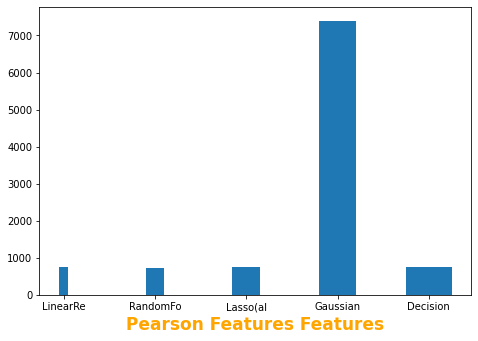

In [128]:
#------ Pearson Features ------------
PerRMSEValues8Features = run_best_model(SelectedModels, X_PCorTrain, Y_PCorTrain, X_PCorTest)
Plot_Graph(PerRMSEValues8Features,'Pearson Features Features')

In [129]:
#------------ ChiSquare -------------
#run_best_model(SelectedModels, X_ChiSQTrain, Y_ChiSQTrain, X_ChiSQTest)

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 904.6294057699812
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 901.2316561363689
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 905.9215368664491
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 17053.664830256716
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 901.2328884624769
Cross Validation Std deviation 0.0


------  RFE Features  ------------



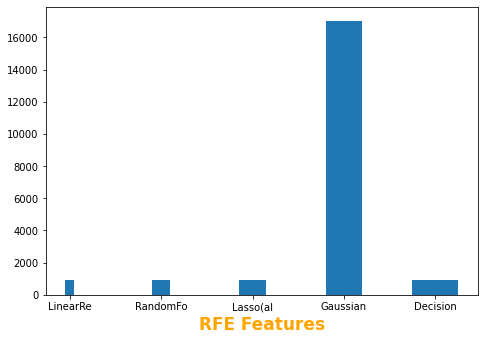

In [130]:
#------------ RFE -------------
RFERMSEValues8Features = run_best_model(SelectedModels, X_RFETrain, Y_RFETrain, X_RFETest)
Plot_Graph(RFERMSEValues8Features,'RFE Features')

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 903.6860952915146
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 898.0786774217391
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 904.6345763929406
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 16187.458466888314
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 898.0812617244734
Cross Validation Std deviation 0.0


------  Lasso Features  ------------



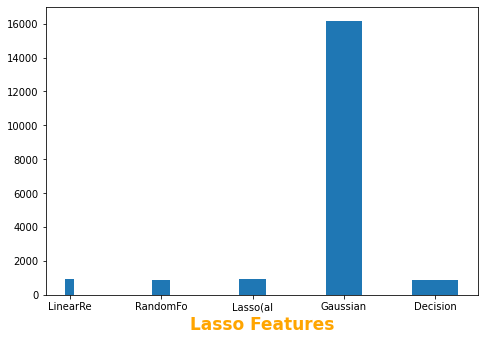

In [131]:
#------------ Lasso -------------
LassoRMSEValues8Features = run_best_model(SelectedModels, X_LASSOTrain, Y_LASSOTrain, X_LASSOTest)
Plot_Graph(LassoRMSEValues8Features,'Lasso Features')

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 665.8523316755653
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 661.099455036967
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 667.0003001965403
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 7040.797743670608
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 673.269962716241
Cross Validation Std deviation 0.0


------  Random Forest Regressor Features  ------------



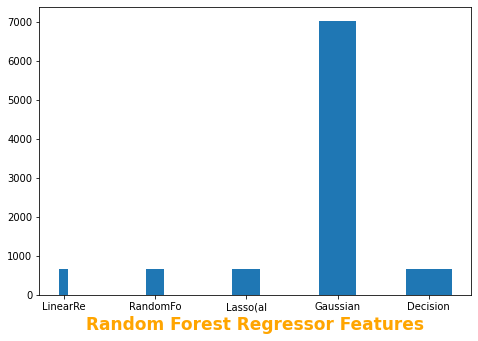

In [132]:
#------------ Random Forest Regressor -------------
RFRRMSEValues8Features = run_best_model(SelectedModels, X_RFTrain, Y_RFTrain, X_RFTest)
Plot_Graph(RFRRMSEValues8Features,'Random Forest Regressor Features')

In [ ]:
#------------- 18 features -------------

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 533.8863876004136
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 503.1294224419738
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 535.9429018452871
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 9056.215709193984
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 549.4766490371312
Cross Validation Std deviation 0.0


------  Pearson Features Features  ------------



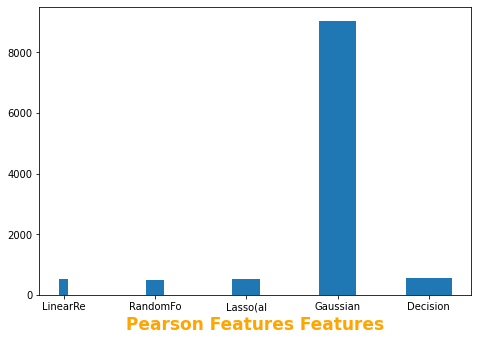

In [144]:
#------ Pearson Features ------------
PerRMSEValues18Features = run_best_model(SelectedModels, X_PCorTrain, Y_PCorTrain, X_PCorTest)
Plot_Graph(PerRMSEValues18Features,'Pearson Features Features')



------  Pearson Features Features  ------------



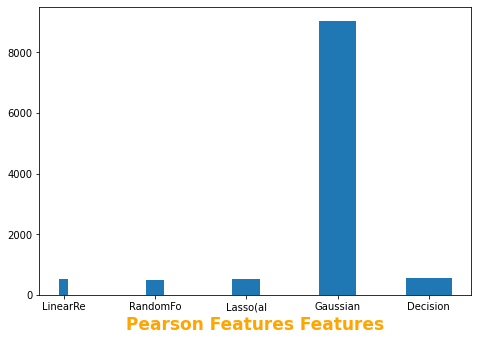

In [145]:
Plot_Graph(PerRMSEValues18Features,'Pearson Features Features')

In [146]:
PerRMSEValues18Features

{'LinearRe': 533,
 'RandomFo': 503,
 'Lasso(al': 535,
 'Gaussian': 9056,
 'Decision': 549}

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 735.2595388101508
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 727.5612885943747
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 741.3932180334481
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 15447.928463453462
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 727.7127735485808
Cross Validation Std deviation 0.0


------  RFE Features  ------------



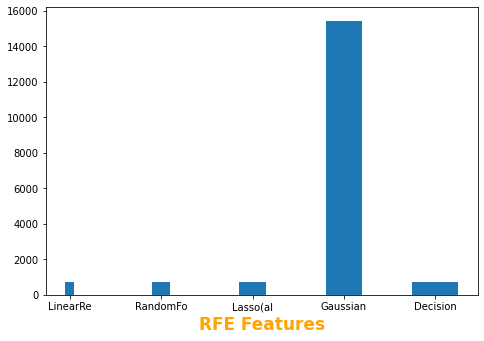

In [147]:
#------------ RFE -------------
RFERMSEValues18Features = run_best_model(SelectedModels, X_RFETrain, Y_RFETrain, X_RFETest)
Plot_Graph(RFERMSEValues18Features,'RFE Features')

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 406.97357242796033
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 392.6064467624432
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 409.82028934633473
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 10335.174017063591
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 451.84095712472663
Cross Validation Std deviation 0.0


------  Lasso Features  ------------



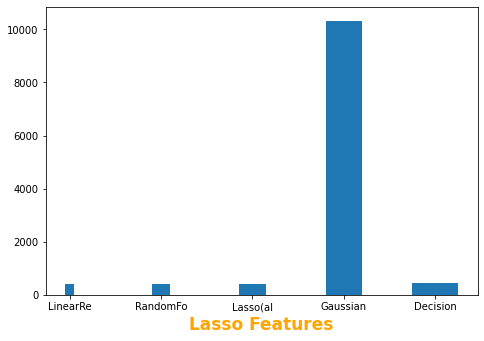

In [148]:
#------------ Lasso -------------
LassoRMSEValues18Features = run_best_model(SelectedModels, X_LASSOTrain, Y_LASSOTrain, X_LASSOTest)
Plot_Graph(LassoRMSEValues18Features,'Lasso Features')



------  Lasso Features  ------------



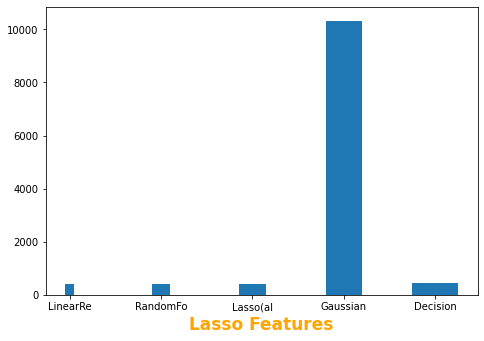

In [149]:
Plot_Graph(LassoRMSEValues18Features,'Lasso Features')

In [150]:
LassoRMSEValues18Features

{'LinearRe': 406,
 'RandomFo': 392,
 'Lasso(al': 409,
 'Gaussian': 10335,
 'Decision': 451}

------------- LinearRegression() -----------------
Mean square error for model  LinearRegression() 398.04668212515685
Cross Validation Std deviation 0.0
------------- RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) -----------------
Mean square error for model  RandomForestRegressor(max_depth=25, min_samples_split=60, n_jobs=4) 387.00234097453335
Cross Validation Std deviation 0.0
------------- Lasso(alpha=0.1) -----------------
Mean square error for model  Lasso(alpha=0.1) 403.46004338512193
Cross Validation Std deviation 0.0
------------- GaussianNB() -----------------
Mean square error for model  GaussianNB() 10518.605595097873
Cross Validation Std deviation 0.0
------------- DecisionTreeRegressor(max_depth=15) -----------------
Mean square error for model  DecisionTreeRegressor(max_depth=15) 445.9270355597252
Cross Validation Std deviation 0.0


------  Random Forest Regressor Features  ------------



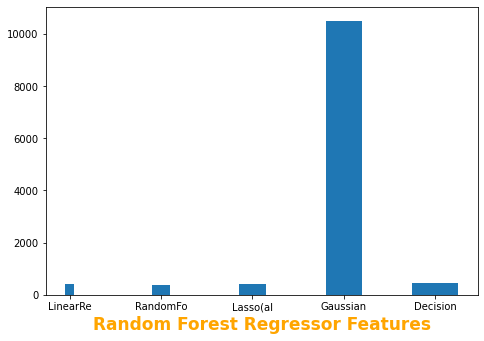

In [151]:
#------------ Random Forest Regressor -------------
RFRRMSEValues18Features = run_best_model(SelectedModels, X_RFTrain, Y_RFTrain, X_RFTest)
Plot_Graph(RFRRMSEValues18Features,'Random Forest Regressor Features')

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data